*Scikit learn already automatically provides you the function called Train Test split. You just import the data and it split it into training and teating the data*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [4]:
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [5]:
# Combination the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), (np.ones(len(cats_data)))))

In [6]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [7]:
# Split data into training and testing
# 0.2 means 20% reserved for testing and 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [10]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

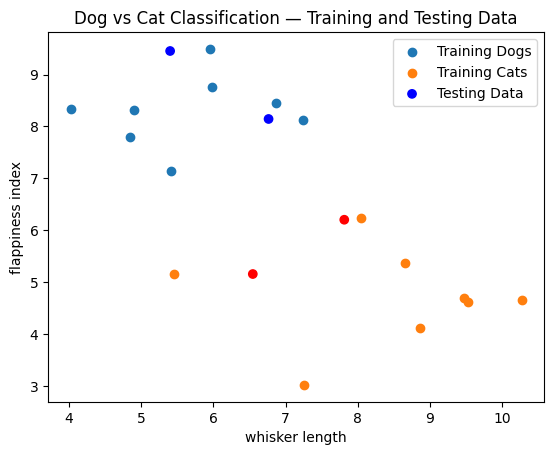

In [8]:

plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label="Training Dogs")
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label="Training Cats")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap="bwr", label="Testing Data")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat Classification — Training and Testing Data")
plt.legend()
plt.show()


In [ ]:
# Implementing Python code to run the alogorithum
# d == 2 , number of features ( whisker length, flappiness index)

def random_linear_classifier(data_dogs, data_cats, k , d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d) # 01x1 +02x2
        theta0 = np.random.normal() #theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0


# Compute Error Function
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog)+theta0 <= 0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta, x_cat)+theta0 > 0:
            error+=1
    return error

         
         

*Now random linear classifier algo run on training data* <br/>
*masks (assumes dogs=1, cats=0; swap if your labels are flipped)*

In [16]:

dogs_tr = X_train[Y_train == 1]
cats_tr = X_train[Y_train == 0]

k = 100
d = 2

best_theta_train, best_theta0_train = random_linear_classifier(dogs_tr, cats_tr, k, d)
train_error = compute_error(dogs_tr, cats_tr, best_theta_train, best_theta0_train)

In [17]:
train_error

0

In [18]:
#Plot the decision boundary
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])

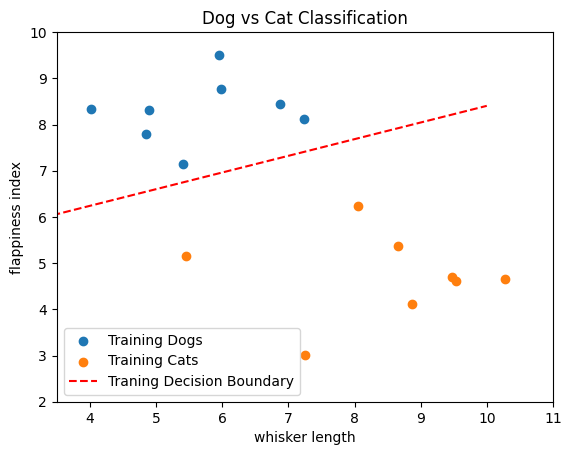

In [19]:
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label="Training Dogs") 
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label="Training Cats") 
plt.plot(x_vals_train, y_vals_train, color="red", linestyle="--", label="Traning Decision Boundary") 
#Set same limits for x and y axes 
plt.xlim([3.5, 11]) 
plt.ylim([2, 10]) 
plt.xlabel("whisker length") 
plt.ylabel("flappiness index") 
plt.title("Dog vs Cat Classification") 
plt.legend() 
plt.show()


In [20]:
print(f"Training Error : {train_error}")

Training Error : 0


In [21]:
# Compute testing error
test_error = compute_error(X_test[Y_test == 0], X_test[Y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error : {test_error}")

Testing Error : 4


In [22]:
# Decision boundary over the TEST range
x_vals_test = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])


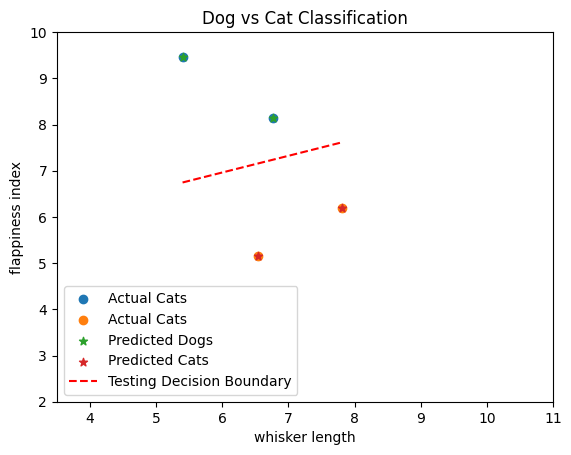

In [23]:
plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], label="Actual Cats")
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label="Actual Cats")


predicted_labels = np.zeros_like(Y_test)
for i, x_test in enumerate(X_test):  # avoid shadowing X_test
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

# Plot predicted test data points
plt.scatter(X_test[predicted_labels == 0][:, 0], X_test[predicted_labels == 0][:, 1], marker="*", label="Predicted Dogs")
plt.scatter(X_test[predicted_labels == 1][:, 0], X_test[predicted_labels == 1][:, 1], marker="*", label="Predicted Cats")
plt.plot(x_vals_test, y_vals_test, color="red", linestyle="--", label="Testing Decision Boundary")

# Set same limits for x and y axes 
plt.xlim([3.5, 11]) 
plt.ylim([2, 10]) 
plt.xlabel("whisker length") 
plt.ylabel("flappiness index") 
plt.title("Dog vs Cat Classification") 
plt.legend() 
plt.show()
 